# Fitts' Law

Fitts' law provides a quantitative relationship between movement time in human pointing and the design of the pointing task. This model is instrumental in HCI for evaluating and designing user interfaces by optimizing the time and effort needed for common tasks. In this notebook, we will explore the mathematical underpinnings of Fitts' Law, demonstrating its application in analyzing and enhancing UI efficiency. The learning outcomes of this notebook are:

* understanding of how mathematical formulas can describe psychological phenomena; and
* being able to apply Fitts' law to make predictions of various UI designs.

## Origins of Fitts' Law

Fitts' Law was formulated in 1954 by psychologist Paul Fitts, originating from his empirical research on human motor skills. His work, deeply rooted in the principles of information theory and cybernetics, sought to understand the control aspects of human movement, particularly in the context of aiming or pointing tasks. Fitts' experiments led to the realization that a logarithmic relationship exists between the speed and accuracy of movements, encapsulated as an equation (the *Fitts' Law*). This discovery was pivotal in linking human cognitive processes with quantifiable metrics, laying a foundation for subsequent research in ergonomics, human factors, and HCI. Fitts' Law stands as a landmark in the history of cognitive psychology and its application to real-world problems.

The original experiment conducted by Paul Fitts involved a simple setup to study the relationship between movement speed and target accuracy. Participants were asked to perform a series of rapid, repetitive pointing tasks using a hand-held stylus. The task required them to move the stylus back and forth between two flat, rectangular targets as quickly and accurately as possible. These targets varied in width (W) and distance (D) from each other. By manipulating these two parameters, Fitts observed how the speed of movement was influenced by the difficulty of the task, which he quantified as the ratio of the distance to the width of the target. This setup provided empirical data that led to the formulation of Fitts' Law, highlighting the logarithmic relationship between the time taken to complete the movement and the difficulty of the task.

<img src="https://gitlab.jyu.fi/jupepajo/rational-user/-/raw/main/modeling_notebooks/fitts_task.png" width="400" height="400" align="center"/>
Figure 1: Illustration of the original Fitts' experiment. Two target rectangles of width W are placed distance D apart, and the participant is tasked with moving a stylus between the targets.

# Definition

Fitts' Law is typically represented by the equation

$
MT = a + b \cdot \log_2\left(\frac{D}{W} + 1\right),
$

where:
- $MT$ is the movement time, the time it takes for a user to move the pointer to the target;
- $a$ and $b$ are empirically determined constants through linear regression;
- $D$ is the distance from the starting point to the center of the target; and
- $W$ is the width of the target.

We can define this as a function.

In [1]:
import numpy as np

def fitts_law(D, W, a, b):
    """
    Calculate the movement time as per Fitts' Law.

    Parameters:
    D (float): Distance from the starting point to the center of the target.
    W (float): Width of the target.
    a, b (float): Empirically determined constants.

    Returns:
    float: Estimated movement time.
    """
    ID = np.log2(D / W + 1)  # Index of Difficulty
    MT = a + b * ID
    return MT


Fitts' law is agnostic to the units of distance, because they cancel out in the equation. With UI design, a standard unit is a pixel. The predicted movement time is in seconds. Let's create a Fitts' law prediction for how a button width impacts movement time, when the distance between the origin of the pointing movement stays constant. You can explore how distance and the constants *a* and *b* impact predictions.

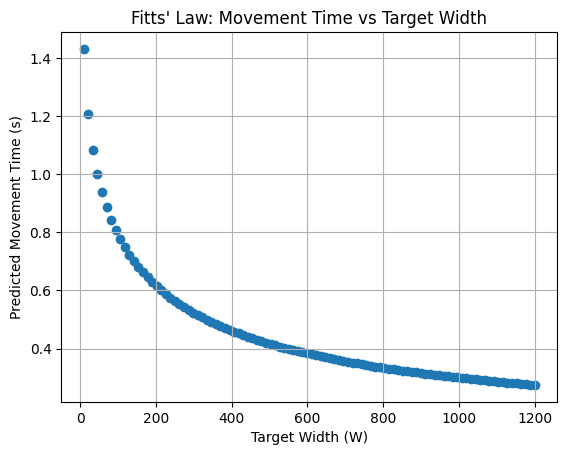

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Fitts' Law function
def fitts_law(D, W, a, b):
    ID = np.log2(D / W + 1)  # Index of Difficulty
    MT = a + b * ID
    return MT

# Constants (example values, should be determined empirically)
a = 0.1
b = 0.2

# Fixed distance
D = 1000  # example distance, you can adjust this

# Generate a range of target widths
target_widths = np.linspace(10, 1200, 100)  # range from 10 to 200 with 20 steps

# Calculate movement times for each target width
movement_times = [fitts_law(D, W, a, b) for W in target_widths]

# Create the scatter plot
plt.scatter(target_widths, movement_times)
plt.title('Fitts\' Law: Movement Time vs Target Width')
plt.xlabel('Target Width (W)')
plt.ylabel('Predicted Movement Time (s)')
plt.grid(True)
plt.show()

# Fitts' Law And UI Design

Fitts' law can be directly used to predict movement times between UI elements, and summed to make predictions of trajectories. Let's create a simple code for creating mockup UIs and try out Fitts' law with it.

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import sqrt

class element():
    def __init__(self, name, x = 0, y = 0, x_size = 1, y_size = 1, color = "blue"):
        self.name = name
        self.x = x
        self.y = y
        self.x_size = x_size
        self.y_size = y_size
        self.color = color

    def loc(self):
        return [int(self.x+self.x_size/2), int(self.y+self.y_size/2)]
 
    def get_size(self):
        return min(self.x_size, self.y_size)

    def distance_to(self, e):
        loc1 = self.loc()
        loc2 = e.loc()
        return sqrt( (loc1[0] - loc2[0])**2 + (loc1[1] - loc2[1])**2 )

def draw_ui(elements, x_size = 0, y_size = 0, fig_width = 20, fig_height = 20):
    # Prepare plot
    plt.style.use('classic')
    fig, ax = plt.subplots()
    # Figure out size
    size_offset = 10    
    for e in elements:
        x_s = e.x + e.x_size + size_offset
        if x_size < x_s:
            x_size = x_s
        y_s = e.y + e.y_size + size_offset
        if y_size < y_s:
            y_size = y_s
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.invert_yaxis()
    ax.set_aspect('equal', adjustable='box')
    # Draw elements
    for e in elements:
        shape = patches.Rectangle((e.x, e.y), e.x_size, e.y_size, fc=e.color)
        ax.add_patch(shape)
        ax.text(e.x, e.y, str(e.name))
    plt.show()

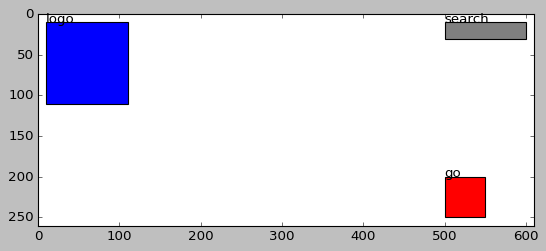

In [16]:
# Make a simple UI of four elements.
elements = [
    element("logo", x = 10, y = 10, x_size = 100, y_size = 100, color = "blue"),
    element("search", x = 500, y = 10, x_size = 100, y_size = 20, color = "grey"),
    element("go", x = 500, y = 200, x_size = 50, y_size = 50, color = "red")
]
draw_ui(elements)

In [17]:
# Create a wrapper for calculating Fitts' law between two elements: from element 1 to element 2.
def fitts_mt(e1, e2, a = 0.1, b = 0.1):
    D = e1.distance_to(e2)
    W = e2.get_size()    
    return fitts_law(D, W, a, b)

def fitts_total_mt(elements, a = 0.1, b = 0.1):
    mt = 0
    for e in range(len(elements) - 1):
        mt += fitts_mt(elements[e], elements[e+1], a, b)
    return mt

In [18]:
# Calculate total movement time of pointing trajectory, starting from logo, going via search, and ending with go.
fitts_total_mt(elements)

0.9036093154911721

With this general formulation of Fitts' law. We can investigate the impact of UI design (in this case, element size) on pointing time.

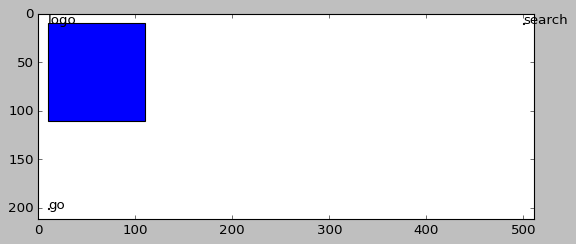

1.9834288634269943


In [23]:
# make 'go' very small # yli 2 s, alle 0.5s
elements = [
    element("logo", x = 10, y = 10, x_size = 100, y_size = 100, color = "blue"),
    element("search", x = 500, y = 10, x_size = 1, y_size = 1, color = "grey"),
    element("go", x = 10, y = 200, x_size = 1, y_size = 1, color = "red")
]
draw_ui(elements)
print(fitts_total_mt(elements))

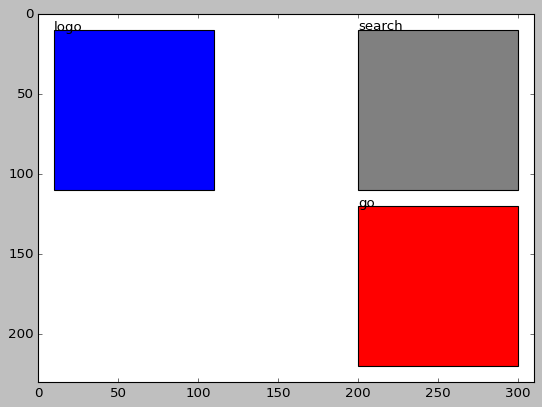

0.4606442228131608


In [25]:
# make 'go' very small # yli 2 s, alle 0.5s
elements = [
    element("logo", x = 10, y = 10, x_size = 100, y_size = 100, color = "blue"),
    element("search", x = 200, y = 10, x_size = 100, y_size = 100, color = "grey"),
    element("go", x = 200, y = 120, x_size = 100, y_size = 100, color = "red")
]
draw_ui(elements)
print(fitts_total_mt(elements))

We can also use Fitts' law to calculate average time to a target, for instance assuming that pointing approaches the target uniformly from other UI elements.

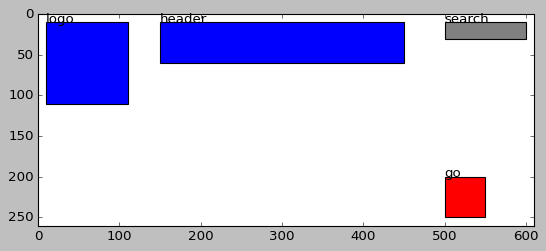

0.38618543028921826


In [26]:
elements = [
    element("logo", x = 10, y = 10, x_size = 100, y_size = 100, color = "blue"),
    element("header", x = 150, y = 10, x_size = 300, y_size = 50, color = "blue"),
    element("search", x = 500, y = 10, x_size = 100, y_size = 20, color = "grey"),
    element("go", x = 500, y = 200, x_size = 50, y_size = 50, color = "red")
]
draw_ui(elements)
fitts_total = 0
for e in elements:
    if e.name != "go":
        # elements[-1] is the last element, which is "go"
        fitts_total += fitts_mt(e, elements[-1])
# Print average
print(fitts_total/(len(elements)-1))

# Fitts' Law Parameters

The parameters $a$ and $b$ in Fitts' law are fitted to a particular device and user. The parameter $a$ is the intercept, and it implies that regardless of how difficult a task is (long distance, small target), there is always some overhead associated with pointing, such as motor preparation. The parmaeter $b$ controls the slope: the larger this parameter, the more impactful distance and target width are on movement time.

For instance, we can simulate a user with motor trouble by increasing both parameter values.

In [27]:
print(fitts_total_mt(elements, a = 0.1, b = 0.1))
print(fitts_total_mt(elements, a = 0.2, b = 0.2))

1.1658850818693143
2.3317701637386286


# Information Processing in Fitts' Law

Fitts' law views motor manipulations as transmission of information between the human decision maker and the interactive system. A human user, equipped with a device such as a mouse, keyboard, joystick, eye movement sensor, or even a some sort of a neural link, transmits information to the system according to an index of performance (IP). The units of IP is bits/s, meaning that the higher the IP, the more information is being transmitted in a second. The task itself has an index of difficuly (ID), which determines how many bits need to be transmitted before the task is completed. Therefore, given movement time (MT), we define $IP = ID/MT$. As index of performance, given a user and a device, stays approximately constant, we can infer that as the task becomes more difficult (IP increases), movement time must equally increase.

We can treat all "motor" actions by the user as transmission of information. For instance, perhaps a successful command will require 128 bits of information (this can encode, e.g., a short sentence). The IP computed for the human hand in the original Fitts' experiment is about 10 bits/s. We can solve how long it takes to transmit one sentence with the hand:

$ IP = ID/MT $,
$ MT = ID/IP $,
$ MT = 128 bits / 10 bits/s = 12.8s $.

In many time-critical tasks, this is too long. Fortunately, we can immediately cut the transmission time in half by assuming that two fingers use the keyboard to type. If we can make efficient use of ten-finger touch typing, we can achieve a theoretical transmission time of $1.28s$. This is a theoretical lower limit: generally a sentence cannot be optimally divided among 10 fingers.


# Assignment

Create a mock-up of a UI you are designing. Investigate how Fitts' law predicts movement time to a key element in the UI from various other elements (or all of them on average). Create a scatterplot that shows how the size of the target element impacts movement time, and investigate the shape of the plot: at what size does more size increase really not pay off anymore?

# Sources

- A good overview of Fitts' law in HCI: MacKenzie, I. S. (1992). Fitts' law as a research and design tool in human-computer interaction. Human-computer interaction, 7(1), 91-139.
- The original paper: Fitts, P. M. (1954). The information capacity of the human motor system in controlling the amplitude of movement. Journal of Experimental Psychology, 47, 381-391.